In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import sys

from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time


plt.rcParams["figure.figsize"] = (9, 6)
warnings.simplefilter("ignore")

sys.path.append("../1_Format_donnees/")
from aggregation import load_and_preprocess_raw_data, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores, plot_feature_importance

### <8 mbits en cumsum = bruit 

In [2]:
WINDOW_SIZE = 250


In [3]:
time_counter = time.time_ns()

df_test = load_and_preprocess_raw_data("../Mesures/test", window_size = WINDOW_SIZE)
df_train = load_and_preprocess_raw_data("../Mesures/train", window_size = WINDOW_SIZE)

process_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Dataset generation took : {process_duration} s")

Load datasets...
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.58it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.50it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.78it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 875.66it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 19.35it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 827.38it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


100%|█████████████████████████████████████████████████████████████████████████████| 765/765 [00:00<00:00, 52469.95it/s]


Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 121.37it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 39.66it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 97.29it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 11.60it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.29it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.33it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.20it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|███████████████████████████████████████████████████████████████████████████████| 805/805 [00:02<00:00, 379.53it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.18it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 33.09it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.41it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 41.67it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 24.49it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.64it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.21it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:01<00:00, 885.81it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|███████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 975.48it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|███████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 998.19it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 91.39it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 51.37it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 77.22it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 96.28it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 305.62it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|███████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 626.65it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 530.97it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 301.10it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|███████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 895.91it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 859.69it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 800.70it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 989.67it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 865.34it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 542.46it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 622.34it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 510.22it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 721.50it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 321.70it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 263.79it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


100%|██████████████████████████████████████████████████████████████████████████| 5593/5593 [00:00<00:00, 115763.89it/s]


Dataset generation took : 206.6629013 s


In [4]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4,3.144274,-0.237542,-0.122433,0.255278,-0.109398,-0.129188,-0.166973,-0.165947,-0.179671,-0.399747,...,-0.397345,-0.401777,-0.306914,-0.349820,-0.468051,-0.045641,1.811260,-0.460430,-0.398890,messenger
20221117_125310_8,-0.153232,-0.016292,-0.122433,-0.100344,-0.109398,-0.129188,-0.427687,-0.165947,0.031398,-0.399747,...,0.002940,-0.446126,-0.452355,-0.386088,-0.468051,0.507473,1.541480,-0.460430,-0.398890,messenger
20221117_125310_7,1.109643,0.044049,-0.122433,-0.100344,-0.109398,-0.129188,-0.427687,-0.165947,-0.028908,-0.399747,...,-0.397345,-0.401777,0.356168,0.283574,-0.422953,-0.466082,-0.432620,-0.460430,-0.398890,messenger
20221117_125310_9,-0.153232,-0.016292,-0.122433,-0.100344,-0.109398,-0.129188,-0.427687,-0.165947,-0.415868,-0.399747,...,-0.397345,0.055965,-0.452355,-0.386088,-0.422953,-0.466082,-0.432620,0.028821,-0.398890,messenger
20221117_125310_10,-0.153232,-0.237542,-0.122433,-0.100344,-0.109398,-0.129188,-0.427687,-0.165947,-0.415868,-0.399747,...,-0.397345,-0.446126,-0.452355,-0.386088,0.416194,1.527744,-0.432620,-0.460430,-0.398890,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_162,-0.153232,-0.016292,-0.122433,-0.100344,-0.109398,-0.129188,-0.200255,-0.165947,-0.028908,-0.399747,...,-0.153639,-0.140437,-0.150527,-0.136098,-0.468051,-0.157758,-0.157131,-0.162558,-0.156716,youtube
20230124_124323_163,-0.153232,-0.016292,-0.122433,-0.100344,-0.109398,-0.129188,-0.155878,-0.165947,-0.028908,-0.399747,...,-0.361989,-0.446126,-0.408566,-0.349820,-0.422953,-0.466082,-0.392653,-0.417215,-0.363756,youtube
20230124_124323_164,-0.153232,-0.016292,-0.122433,-0.100344,-0.109398,-0.129188,-0.200255,-0.165947,0.031398,-0.399747,...,-0.153639,-0.140437,-0.150527,-0.136098,-0.157196,-0.157758,-0.157131,-0.460430,-0.156716,youtube


In [5]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

In [6]:
time_counter = time.time_ns()

model = RandomForestClassifier(class_weight = "balanced")
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 0.8212323 s for a dataset length of 1284


In [7]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.0246017 s for a dataset length of 452
Testing Duration per data : 0.054428539823008854 ms


normalized confusion matrix


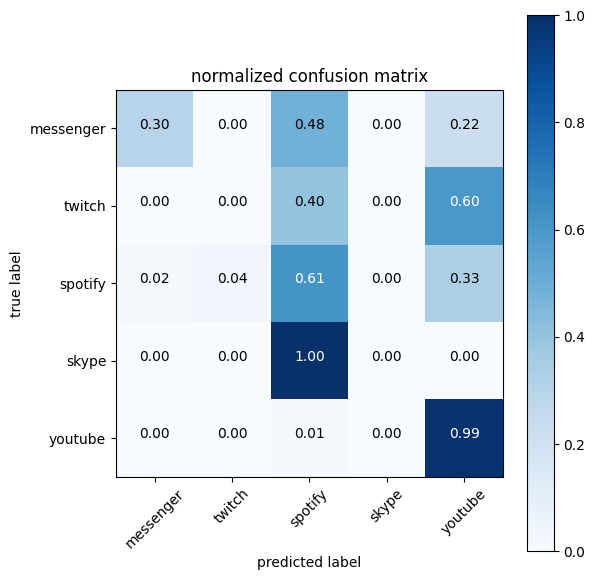

In [8]:
plot_confusion_matrix(true_labels,preds_labels)

In [9]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.3798502103211244,
 'Precision': 0.8725010056315367,
 'Recall': 0.8849557522123894,
 'F1_Score': 0.8690807075698791,
 'support': None}

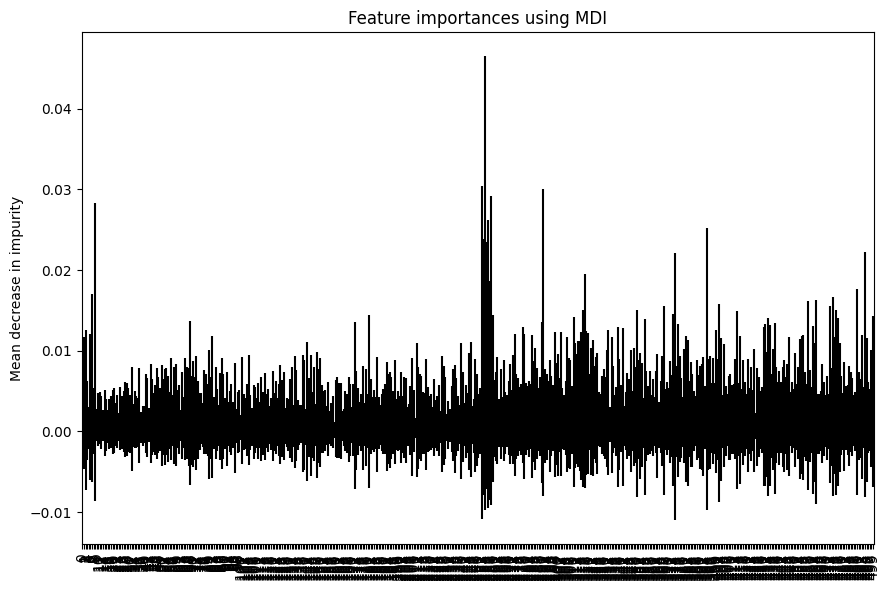

In [10]:

    
plot_feature_importance(model, training_data.columns[:-1])